In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U scikit-learn


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from librosa import magphase
import os

In [ ]:
# Set paths
root_dir = '/content/drive/MyDrive/Animal_Dataset'  # Path to main data folder

# Define animal categories
animals = ['Elephant', 'Leopard', 'Otter','Birds','Tiger']

# Iterate through each animal category
for animal in animals:
    animal_folder = os.path.join(root_dir, animal)
    file_count = len(os.listdir(animal_folder))
    print(f"{animal.capitalize()} has {file_count} files.")


Elephant has 600 files.
Leopard has 600 files.
Otter has 600 files.
Birds has 600 files.
Tiger has 1200 files.


Elephant has 600 files.
Tiger has 1200 files.
Leopard has 600 files.
Otter has 600 files.
Birds has 600 files.


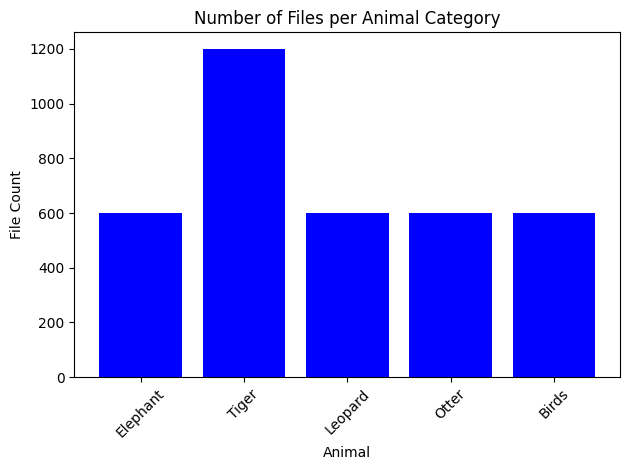

In [ ]:
import os
import matplotlib.pyplot as plt

# Set paths
root_dir = '/content/drive/MyDrive/Animal_Dataset'  # Path to main data folder

# Define animal categories
animals = ['Elephant', 'Tiger', 'Leopard', 'Otter','Birds']

# List to store file counts
file_counts = []

# Iterate through each animal category
for animal in animals:
    animal_folder = os.path.join(root_dir, animal)
    file_count = len(os.listdir(animal_folder))
    file_counts.append(file_count)
    print(f"{animal.capitalize()} has {file_count} files.")

# Create a bar graph to visualize file counts
plt.bar(animals, file_counts, color='blue')
plt.xlabel('Animal')
plt.ylabel('File Count')
plt.title('Number of Files per Animal Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the graph
plt.show()


In [ ]:
pip install pydub


In [ ]:
!pip install --upgrade matplotlib pydub


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

# Set paths
root_dir = '/content/drive/MyDrive/Animal_Dataset'  # Path to main data folder
output_dir = '/content/drive/MyDrive/ Features_Output'  # Directory to save CSV file

# Define animal categories
animals = ['Elephant', 'Tiger', 'Leopard', 'Otter','Birds']
clip_length = 10  # Desired clip length in seconds
num_mfccs = 20  # Number of MFCC coefficients
num_chroma = 20  # Number of chroma coefficients
feature_data = []

# Define function to extract features and adjust clip length
def extract_features(file_path, clip_length):
    try:
        audio, sr = librosa.load(file_path, sr=None, duration=clip_length)
        if len(audio) < sr * clip_length:
            padding = np.zeros(sr * clip_length - len(audio))
            audio = np.concatenate((audio, padding))
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=num_mfccs)
        zcr = librosa.feature.zero_crossing_rate(audio)
        mel = librosa.feature.melspectrogram(y=audio, sr=sr)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr, n_chroma=num_chroma)
        return mfccs, zcr, mel, chroma
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None, None, None

# Iterate through each animal category
for animal in animals:
    animal_folder = os.path.join(root_dir, animal)

    for file_name in os.listdir(animal_folder):
        file_path = os.path.join(animal_folder, file_name)
        mfccs, zcr, mel, chroma = extract_features(file_path, clip_length)

        if mfccs is not None and zcr is not None and mel is not None and chroma is not None:
            label = animal  # Use animal name as label
            feature_data.append((mfccs, zcr, mel, chroma, label))

# Filter out entries with None values
feature_data = [data for data in feature_data if all(item is not None for item in data[:4])]

# Calculate the minimum number of frames among all features
min_frames = min(data[0].shape[1] for data in feature_data)

# Calculate the mean of each feature across frames
mean_features = []
for data in feature_data:
    mfcc_mean = np.mean(data[0][:, :min_frames], axis=1)
    zcr_mean = np.mean(data[1], axis=1)
    mel_mean = np.mean(data[2][:, :min_frames], axis=1)
    chroma_mean = np.mean(data[3][:, :min_frames], axis=1)
    mean_features.append(np.concatenate((mfcc_mean, zcr_mean, mel_mean, chroma_mean)))

mean_features = np.array(mean_features)

# Add class labels as a separate column (animal names)
class_labels = np.array([data[4] for data in feature_data])

# Create column labels
columns = []
for i in range(num_mfccs):
    columns.append(f'mean_mfcc_{i}')
for i in range(zcr_mean.shape[0]):
    columns.append(f'mean_zcr_{i}')
for i in range(mel_mean.shape[0]):
    columns.append(f'mean_mel_{i}')
for i in range(num_chroma):
    columns.append(f'mean_chroma_{i}')
columns.append('label')

# Create a DataFrame with mean features and class labels
df = pd.DataFrame(data=np.hstack((mean_features, class_labels.reshape(-1, 1))),
                  columns=columns)

# Save the DataFrame to CSV
output_file = os.path.join(output_dir, 'Animal_dataset.csv')
df.to_csv(output_file, index=False)
print("Combined Features with Labels and Chroma shape:", df.shape)


Combined Features with Labels and Chroma shape: (3600, 170)


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ Features_Output/Animal_dataset.csv")
print(df)

      mean_mfcc_0  mean_mfcc_1  mean_mfcc_2  mean_mfcc_3  mean_mfcc_4  \
0      -96.648872   125.105682  -112.535767    15.003340   -47.231117   
1     -511.091326     4.394056     4.381178     4.361277     4.336378   
2     -416.632798   158.207236    39.090083    46.546223    16.424702   
3     -401.349182   137.640137    45.863201    43.460575    22.847439   
4     -227.983759   181.369224    47.390835    55.696256    -3.753796   
...           ...          ...          ...          ...          ...   
3595  -514.703003  -143.669937    21.924623    70.100807   -70.283981   
3596  -460.455963   -72.751877    -1.789130    54.017498   -39.948242   
3597  -657.724243  -121.535103    29.158520    51.721931   -58.584011   
3598  -555.860986  -151.182721    26.300013    64.806272   -61.942136   
3599  -480.061133   -55.327978   -14.102410    65.521576   -33.795503   

      mean_mfcc_5  mean_mfcc_6  mean_mfcc_7  mean_mfcc_8  mean_mfcc_9  ...  \
0       -2.304532   -24.670204    -2.609567  

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os

# Specify the full path to the input CSV file
input_file = '/content/drive/MyDrive/ Features_Output/Animal_dataset.csv'

# Load the input CSV file
df = pd.read_csv(input_file)

# Assuming that the labels are in the last column
labels_column = df.columns[-1]

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the labels and replace the original column
df[labels_column] = label_encoder.fit_transform(df[labels_column])

# Define a mapping of original animal labels to encoded codes
class_label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Specify the path to the folder where you want to save the CSV file
output_folder = '/content/drive/MyDrive/ Features_Output'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Save the DataFrame to a new CSV file in the specified folder
output_file = os.path.join(output_folder, 'Final_1.csv')
df.to_csv(output_file, index=False)

print("Label encoding completed and saved to", output_file)

# Print the unique animal labels and their encoded codes
print("Unique animal labels:", df[labels_column].unique())
print("Class label mapping:")
for label, code in class_label_mapping.items():
    print(f"Animal: {label} is encoded as {code}")


Label encoding completed and saved to /content/drive/MyDrive/ Features_Output/Final_1.csv
Unique animal labels: [1 4 2 3 0]
Class label mapping:
Animal: Birds is encoded as 0
Animal: Elephant is encoded as 1
Animal: Leopard is encoded as 2
Animal: Otter is encoded as 3
Animal: Tiger is encoded as 4


In [ ]:
 df=pd.read_csv("/content/drive/MyDrive/ Features_Output/Final_1.csv")
print(df)

      mean_mfcc_0  mean_mfcc_1  mean_mfcc_2  mean_mfcc_3  mean_mfcc_4  \
0      -96.648872   125.105682  -112.535767    15.003340   -47.231117   
1     -511.091326     4.394056     4.381178     4.361277     4.336378   
2     -416.632798   158.207236    39.090083    46.546223    16.424702   
3     -401.349182   137.640137    45.863201    43.460575    22.847439   
4     -227.983759   181.369224    47.390835    55.696256    -3.753796   
...           ...          ...          ...          ...          ...   
3595  -514.703003  -143.669937    21.924623    70.100807   -70.283981   
3596  -460.455963   -72.751877    -1.789130    54.017498   -39.948242   
3597  -657.724243  -121.535103    29.158520    51.721931   -58.584011   
3598  -555.860986  -151.182721    26.300013    64.806272   -61.942136   
3599  -480.061133   -55.327978   -14.102410    65.521576   -33.795503   

      mean_mfcc_5  mean_mfcc_6  mean_mfcc_7  mean_mfcc_8  mean_mfcc_9  ...  \
0       -2.304532   -24.670204    -2.609567  

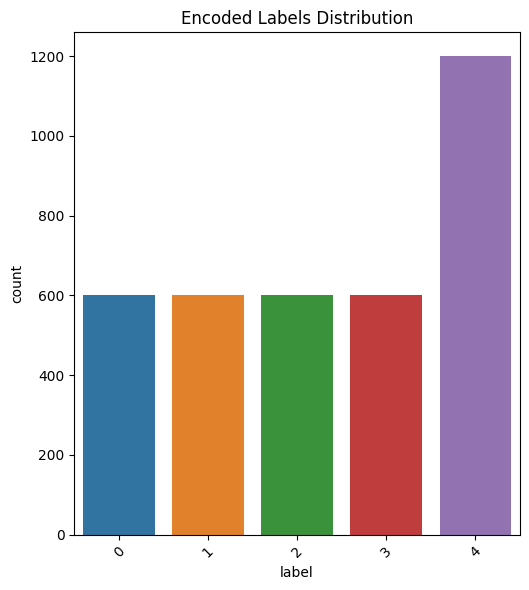

Unique encoded labels: [1 4 2 3 0]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the full path to the encoded CSV file
encoded_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'

# Load the encoded CSV file
df = pd.read_csv(encoded_file)

# Assuming that the encoded labels are in a specific column (e.g., 'encoded_labels')
encoded_labels_column = 'labels'  # Replace with the correct column name

# Visualize the label encoding results
plt.figure(figsize=(10, 6))

# Plot the distribution of the encoded labels
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=labels_column)
plt.title('Encoded Labels Distribution')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Print the unique encoded labels
print("Unique encoded labels:", df[labels_column].unique())


# **SVM**

Classifier: SVM
Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

    Elephant       0.67      0.84      0.74       107
       Tiger       0.82      0.72      0.77       147
     Leopard       0.72      0.77      0.74       111
       Otter       0.90      0.84      0.87       117
       Birds       0.93      0.89      0.91       238

    accuracy                           0.82       720
   macro avg       0.81      0.81      0.80       720
weighted avg       0.83      0.82      0.82       720



<Figure size 1000x600 with 0 Axes>

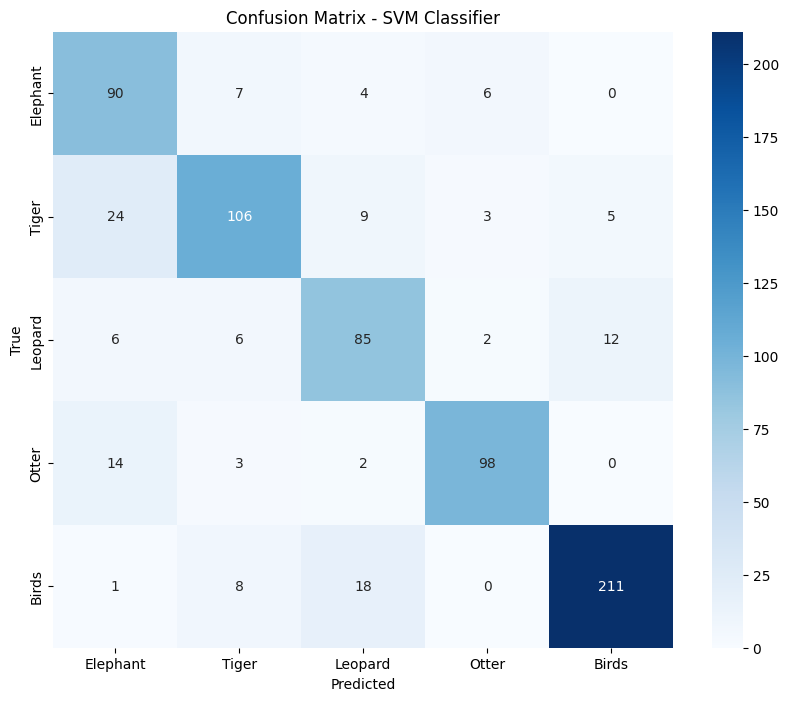

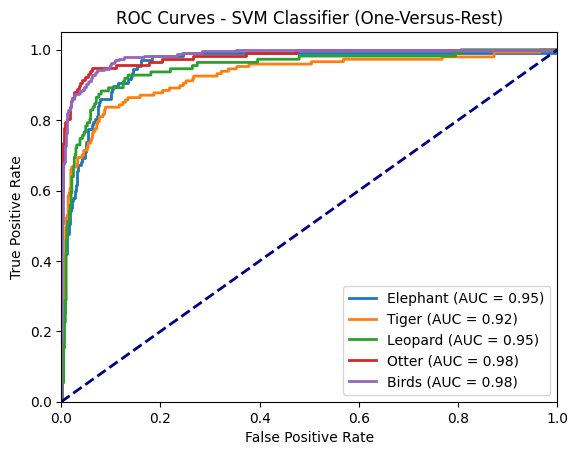

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Load the features DataFrame
features_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'
df = pd.read_csv(features_file)

# Replace 'animals' with your actual class labels
animals = ['Elephant', 'Tiger', 'Leopard', 'Otter','Birds']  # Replace with your class labels

# Split the data into features (X) and labels (y)
X = df.drop(columns=['label'])
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'SVM': SVC(kernel='linear', probability=True),
}

# Create a dictionary to store results
results = {}

# Create a figure to hold ROC curves
plt.figure(figsize=(10, 6))

# Iterate through classifiers
for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    class_rep = classification_report(y_test, y_pred, target_names=animals)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", class_rep)

    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=animals, yticklabels=animals)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {clf_name} Classifier')
    plt.show()

    # Compute ROC curve and ROC area for each class (One-Versus-Rest)
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(animals)):
        y_true_class = np.where(y_test == i, 1, 0)
        y_score_class = clf.predict_proba(X_test_scaled)[:, i]
        fpr[i], tpr[i], _ = roc_curve(y_true_class, y_score_class)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    for i in range(len(animals)):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{animals[i]} (AUC = {roc_auc[i]:.2f})')

# Create a pandas DataFrame from the results
results_df = pd.DataFrame.from_dict(results, orient='index')

# Customize the ROC plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - SVM Classifier (One-Versus-Rest)')
plt.legend(loc='lower right')
plt.show()


# **KNN**

KNN Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

    Elephant       0.76      0.75      0.75       107
       Tiger       0.86      0.65      0.74       147
     Leopard       0.58      0.83      0.68       111
       Otter       0.83      0.89      0.86       117
       Birds       0.95      0.88      0.91       238

    accuracy                           0.81       720
   macro avg       0.80      0.80      0.79       720
weighted avg       0.83      0.81      0.81       720



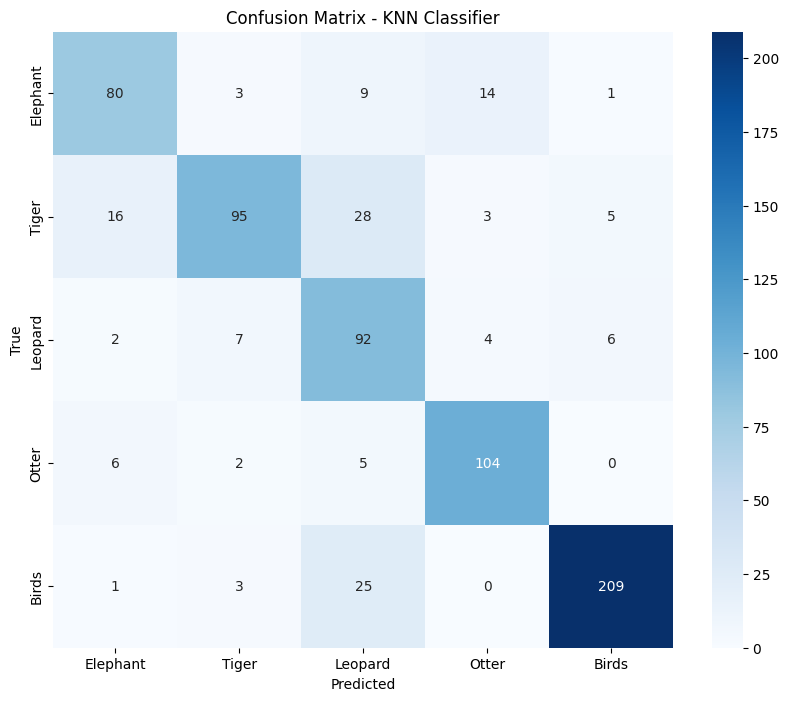

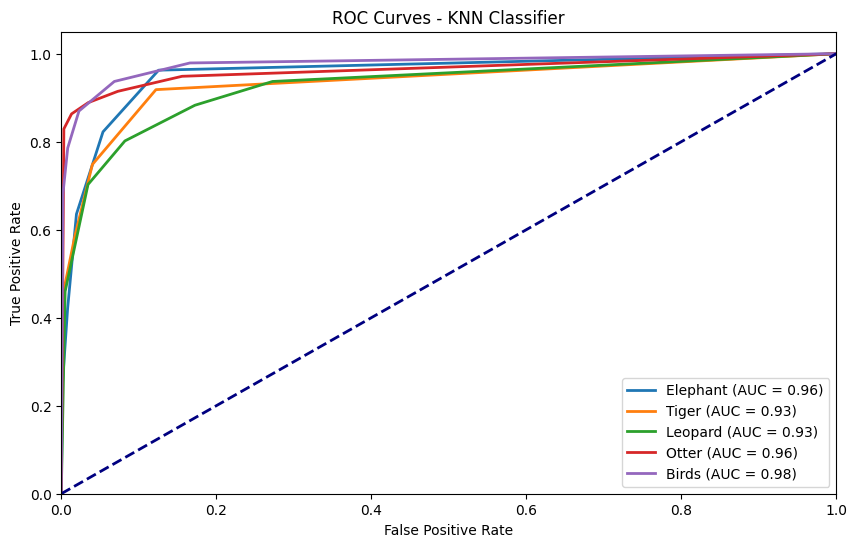

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Load the features DataFrame
features_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'
df = pd.read_csv(features_file)

# Replace 'animals' with your actual class labels
animals = ['Elephant', 'Tiger', 'Leopard', 'Otter', 'Birds']  # Replace with your class labels

# Split the data into features (X) and labels (y)
X = df.drop(columns=['label'])
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Calculate accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

from sklearn.metrics import classification_report

# Get the classification report
classification_rep = classification_report(y_test, y_pred_knn, target_names=animals)

# Print the classification report
print("Classification Report:\n", classification_rep)


# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=animals, yticklabels=animals)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(animals)):
    y_true_class = np.where(y_test == i, 1, 0)
    y_score_class = knn_classifier.predict_proba(X_test_scaled)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_score_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
for i in range(len(animals)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{animals[i]} (AUC = {roc_auc[i]:.2f})')

# Customize the ROC plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - KNN Classifier')
plt.legend(loc='lower right')
plt.show()


# **ML MODELS**

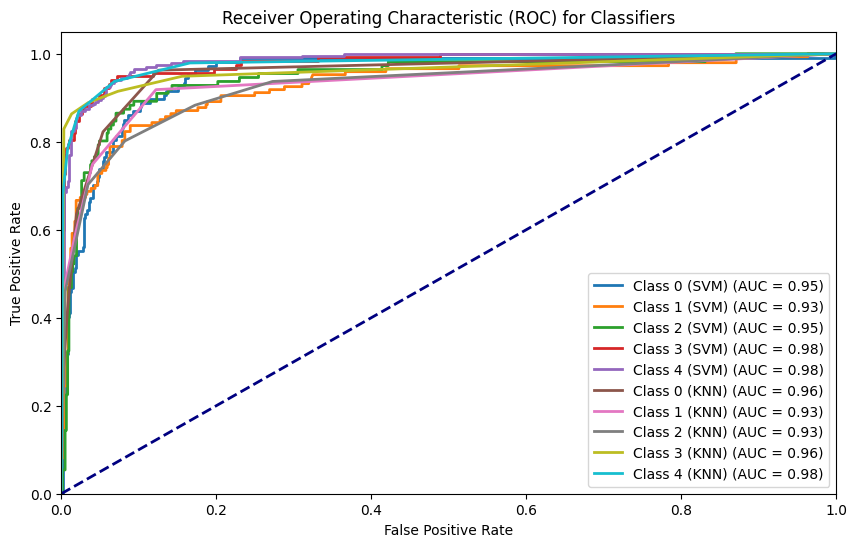

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the features DataFrame
features_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'
df = pd.read_csv(features_file)

# Split the data into features (X) and labels (y)
X = df.drop(columns=['label'])
y = df['label']

# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4])  # Adjust the classes as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
}

# Create a figure to hold ROC curves
plt.figure(figsize=(10, 6))

# Iterate through classifiers
for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train.argmax(axis=1))  # Use argmax to convert one-hot labels to integers
    y_score = clf.predict_proba(X_test_scaled)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    for i in range(y_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ({clf_name}) (AUC = {roc_auc[i]:.2f})')

# Customize the ROC plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Classifiers')
plt.legend(loc='lower right')
plt.show()


# **1D CNN**

Training the model...
Epoch 1/100
41/41 [==============================] - 10s 177ms/step - loss: 1.4398 - accuracy: 0.3904 - val_loss: 1.0957 - val_accuracy: 0.6285
Epoch 2/100
41/41 [==============================] - 4s 91ms/step - loss: 1.0908 - accuracy: 0.5702 - val_loss: 0.8600 - val_accuracy: 0.6979
Epoch 3/100
41/41 [==============================] - 2s 45ms/step - loss: 0.9716 - accuracy: 0.6138 - val_loss: 0.7622 - val_accuracy: 0.7153
Epoch 4/100
41/41 [==============================] - 2s 45ms/step - loss: 0.8378 - accuracy: 0.6883 - val_loss: 0.7001 - val_accuracy: 0.7535
Epoch 5/100
41/41 [==============================] - 2s 53ms/step - loss: 0.7907 - accuracy: 0.7010 - val_loss: 0.6829 - val_accuracy: 0.7396
Epoch 6/100
41/41 [==============================] - 3s 81ms/step - loss: 0.7295 - accuracy: 0.7373 - val_loss: 0.6336 - val_accuracy: 0.7639
Epoch 7/100
41/41 [==============================] - 3s 69ms/step - loss: 0.7435 - accuracy: 0.7369 - val_loss: 0.6702 - val

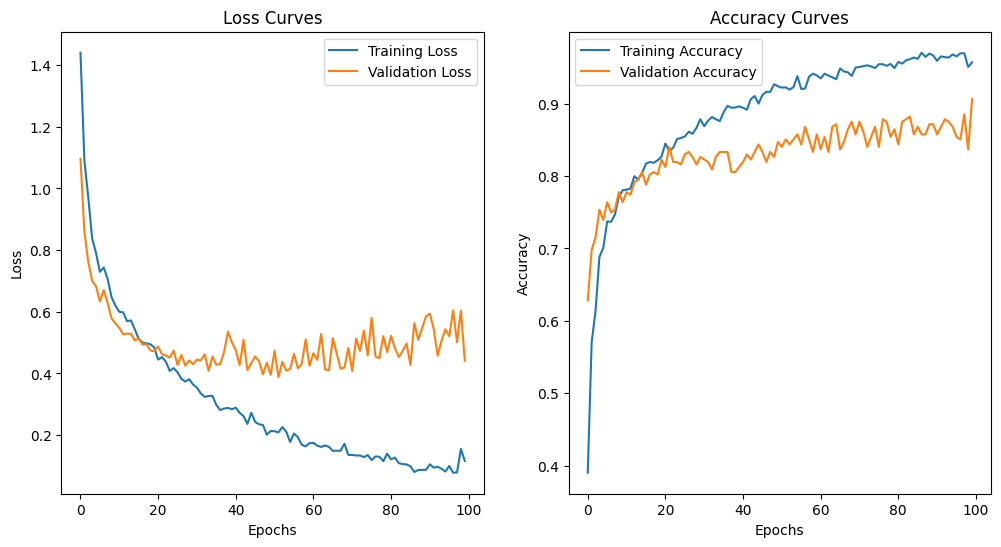

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the CSV file with features
csv_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Split data into features (X) and labels (y)
X = data.iloc[:, :-1].values  # Exclude the last column ('label')
y = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the features to match 1D CNN input format
num_features = X_train.shape[1]
X_train_reshaped = X_train.reshape(X_train.shape[0], num_features, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], num_features, 1)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Build the 1D CNN model
model = Sequential()

# Add Convolutional and Pooling Layers
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(num_features, 1)))
model.add(MaxPooling1D(pool_size=2))

# Add more Convolutional and Pooling Layers
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output for the dense layers
model.add(GlobalAveragePooling1D())

# Add Dense Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer

# Output Layer
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with the desired optimizer and loss function
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model and capture the training history
print("Training the model...")
history = model.fit(X_train_reshaped, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test_reshaped, y_test_one_hot)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict class labels on the test set
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot training history (optional)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.show()


Training the model...

Evaluating the model on the test set...
23/23 [==============================] - 0s 7ms/step


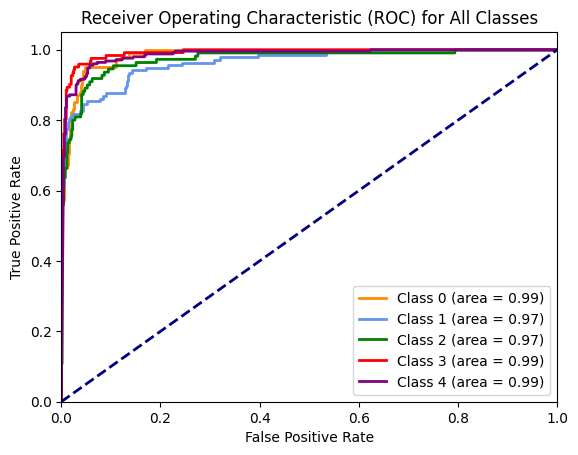

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load the CSV file with features
csv_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Split data into features (X) and labels (y)
X = data.iloc[:, :-1].values  # Exclude the last column ('label')
y = data['label'].values

# Shuffle the data (optional)
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the features to match 1D CNN input format
num_features = X_train.shape[1]
X_train_reshaped = X_train.reshape(X_train.shape[0], num_features, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], num_features, 1)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Build the 1D CNN model
model = Sequential()

# Add Convolutional and Pooling Layers
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(num_features, 1)))
model.add(MaxPooling1D(pool_size=2))

# Add more Convolutional and Pooling Layers
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output for the dense layers
model.add(GlobalAveragePooling1D())

# Add Dense Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer

# Output Layer
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with the desired optimizer and loss function
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model without verbose output (no epoch details)
print("Training the model...")
history = model.fit(X_train_reshaped, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.1, verbose=0)

# Evaluate the model on the test set
print("\nEvaluating the model on the test set...")

# Predict class probabilities on the test set
y_prob = model.predict(X_test_reshaped)

# Initialize dictionaries to store FPR and TPR for each class
fpr = {}
tpr = {}
roc_auc = {}

# Calculate ROC for each class
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure()
colors = ['darkorange', 'cornflowerblue', 'green', 'red', 'purple']  # Add more colors as needed
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for All Classes')
plt.legend(loc='lower right')

# Save the ROC curve plot as an image (optional)
plt.savefig('roc_curves.png')

# Display the ROC curve plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CSV file with features
csv_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Split data into features (X) and labels (y)
X = data.iloc[:, :-1].values  # Exclude the last column ('label')
y = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the features to match 1D CNN input format
num_features = X_train.shape[1]
X_train_reshaped = X_train.reshape(X_train.shape[0], num_features, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], num_features, 1)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Build the 1D CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(num_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y)), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model without printing the training details
model.fit(X_train_reshaped, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.1, verbose=0)

# Define the full path to your preferred directory location
save_path = '/content/drive/MyDrive/ Features_Output/1dcnnmodel.h5'

# Save the entire model to the preferred drive location
model.save(save_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **RNN- LSTM**

Training the RNN model...
Epoch 1/100
41/41 [==============================] - 5s 23ms/step - loss: 7.7280 - accuracy: 0.3310 - val_loss: 1.5654 - val_accuracy: 0.5868
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 2.1893 - accuracy: 0.4869 - val_loss: 0.9992 - val_accuracy: 0.6250
Epoch 3/100
41/41 [==============================] - 1s 18ms/step - loss: 1.3462 - accuracy: 0.5104 - val_loss: 0.8993 - val_accuracy: 0.6667
Epoch 4/100
41/41 [==============================] - 1s 18ms/step - loss: 1.1982 - accuracy: 0.5475 - val_loss: 0.8267 - val_accuracy: 0.6771
Epoch 5/100
41/41 [==============================] - 1s 16ms/step - loss: 1.1219 - accuracy: 0.5710 - val_loss: 0.8065 - val_accuracy: 0.6806
Epoch 6/100
41/41 [==============================] - 0s 10ms/step - loss: 1.0353 - accuracy: 0.5725 - val_loss: 0.7490 - val_accuracy: 0.6944
Epoch 7/100
41/41 [==============================] - 1s 13ms/step - loss: 0.9356 - accuracy: 0.6038 - val_loss: 0.7419 - v

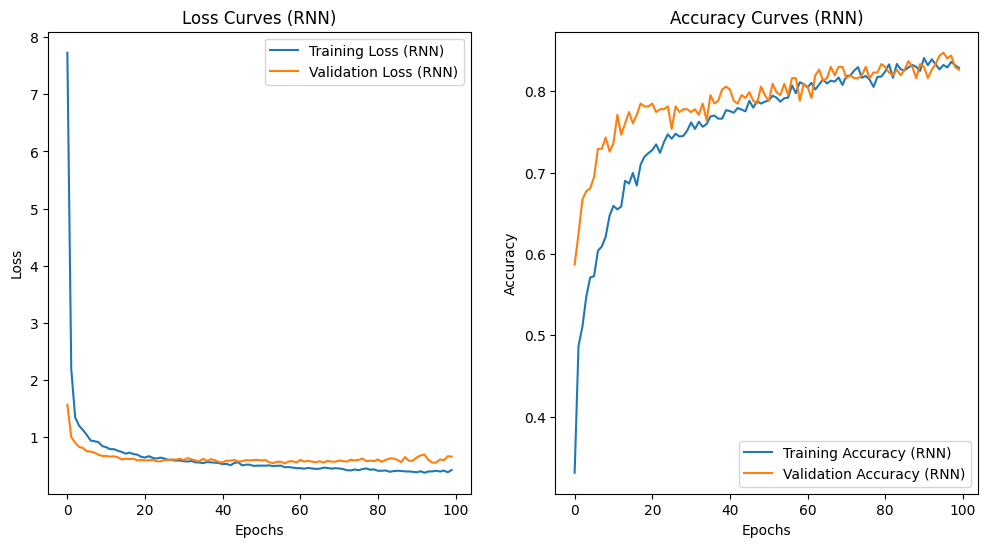

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the CSV file with features
csv_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Split data into features (X) and labels (y)
X = data.iloc[:, :-1].values  # Exclude the last column ('label')
y = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the features for the RNN input format
num_features = X_train.shape[1]
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, num_features)
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, num_features)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Build the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(1, num_features), activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with the desired optimizer and loss function
model_rnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model and capture the training history
print("Training the RNN model...")
history_rnn = model_rnn.fit(X_train_reshaped, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the RNN model on the test set
print("\nEvaluating the RNN model on the test set...")
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_reshaped, y_test_one_hot)
print(f"Test Loss (RNN): {loss_rnn:.4f}")
print(f"Test Accuracy (RNN): {accuracy_rnn:.4f}")

# Predict class labels on the test set using the RNN model
y_pred_rnn = np.argmax(model_rnn.predict(X_test_reshaped), axis=1)

# Print classification report for the RNN model
class_report_rnn = classification_report(y_test, y_pred_rnn)
print("Classification Report (RNN):")
print(class_report_rnn)

# Plot training history for the RNN model (optional)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss (RNN)')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss (RNN)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves (RNN)')

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy (RNN)')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy (RNN)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves (RNN)')

plt.show()


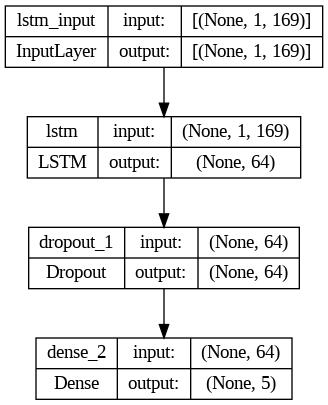

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Load the CSV file with features
csv_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Split data into features (X) and labels (y)
X = data.iloc[:, :-1].values  # Exclude the last column ('label')
y = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the features for the RNN input format
num_features = X_train.shape[1]
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, num_features)
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, num_features)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Build the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(1, num_features), activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with the desired optimizer and loss function
model_rnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


# Plot the architecture of the RNN model and save it as a JPG image
plot_model(model_rnn, to_file='rnn_model_architecture.jpg', show_shapes=True, show_layer_names=True)




# **2D CNN**

Training the 2D CNN model...
Epoch 1/100
41/41 [==============================] - 2s 18ms/step - loss: 1.8223 - accuracy: 0.5637 - val_loss: 0.7913 - val_accuracy: 0.7465
Epoch 2/100
41/41 [==============================] - 1s 13ms/step - loss: 0.9530 - accuracy: 0.6817 - val_loss: 0.6862 - val_accuracy: 0.7500
Epoch 3/100
41/41 [==============================] - 1s 14ms/step - loss: 0.8213 - accuracy: 0.7083 - val_loss: 0.6376 - val_accuracy: 0.7604
Epoch 4/100
41/41 [==============================] - 1s 13ms/step - loss: 0.7427 - accuracy: 0.7265 - val_loss: 0.5862 - val_accuracy: 0.7847
Epoch 5/100
41/41 [==============================] - 1s 13ms/step - loss: 0.7039 - accuracy: 0.7404 - val_loss: 0.5836 - val_accuracy: 0.7743
Epoch 6/100
41/41 [==============================] - 1s 13ms/step - loss: 0.6565 - accuracy: 0.7539 - val_loss: 0.5750 - val_accuracy: 0.7812
Epoch 7/100
41/41 [==============================] - 1s 13ms/step - loss: 0.6250 - accuracy: 0.7635 - val_loss: 0.5624 

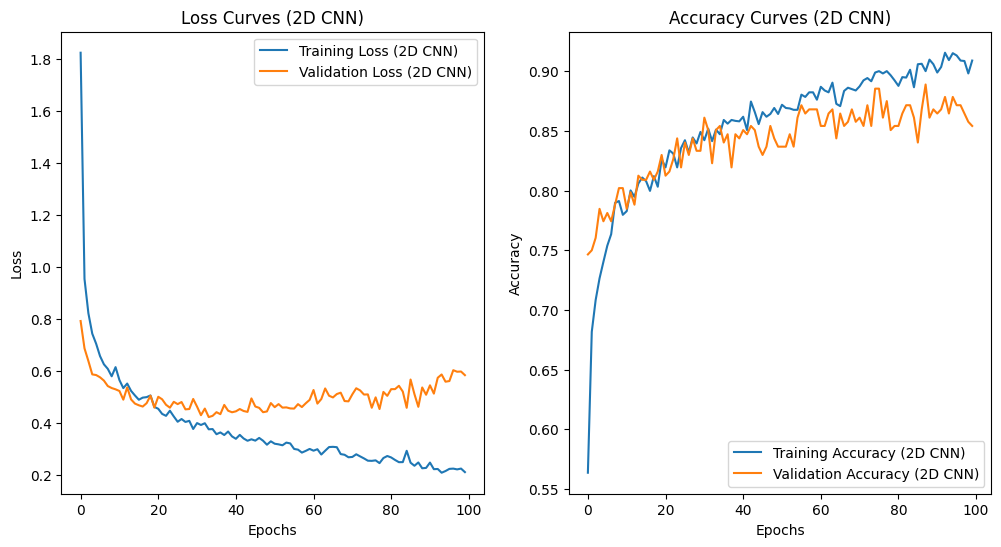

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the CSV file with features
csv_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Split data into features (X) and labels (y)
X = data.iloc[:, :-1].values  # Exclude the last column ('label')
y = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the features for the 2D CNN input format
num_rows, num_columns = 13, 13  # Adjust as needed based on your feature dimensions
X_train_reshaped = X_train.reshape(X_train.shape[0], num_rows, num_columns, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], num_rows, num_columns, 1)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Build the 2D CNN model
model_cnn2d = Sequential()
model_cnn2d.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(num_rows, num_columns, 1)))
model_cnn2d.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn2d.add(Flatten())
model_cnn2d.add(Dense(128, activation='relu'))
model_cnn2d.add(Dropout(0.5))
model_cnn2d.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with the desired optimizer and loss function
model_cnn2d.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the 2D CNN model and capture the training history
print("Training the 2D CNN model...")
history_cnn2d = model_cnn2d.fit(X_train_reshaped, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the 2D CNN model on the test set
print("\nEvaluating the 2D CNN model on the test set...")
loss_cnn2d, accuracy_cnn2d = model_cnn2d.evaluate(X_test_reshaped, y_test_one_hot)
print(f"Test Loss (2D CNN): {loss_cnn2d:.4f}")
print(f"Test Accuracy (2D CNN): {accuracy_cnn2d:.4f}")

# Predict class labels on the test set using the 2D CNN model
y_pred_cnn2d = np.argmax(model_cnn2d.predict(X_test_reshaped), axis=1)

# Print classification report for the 2D CNN model
class_report_cnn2d = classification_report(y_test, y_pred_cnn2d)
print("Classification Report (2D CNN):")
print(class_report_cnn2d)

# Plot training history for the 2D CNN model (optional)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn2d.history['loss'], label='Training Loss (2D CNN)')
plt.plot(history_cnn2d.history['val_loss'], label='Validation Loss (2D CNN)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves (2D CNN)')

plt.subplot(1, 2, 2)
plt.plot(history_cnn2d.history['accuracy'], label='Training Accuracy (2D CNN)')
plt.plot(history_cnn2d.history['val_accuracy'], label='Validation Accuracy (2D CNN)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves (2D CNN)')

plt.show()


23/23 [==============================] - 0s 4ms/step


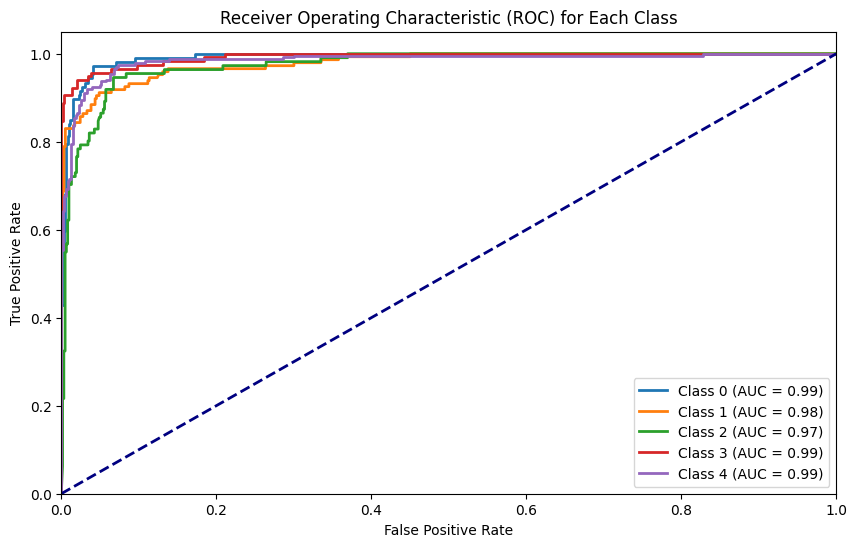

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the CSV file with features
csv_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Split data into features (X) and labels (y)
X = data.iloc[:, :-1].values  # Exclude the last column ('label')
y = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the features for the 2D CNN input format
num_rows, num_columns = 13, 13  # Adjust as needed based on your feature dimensions
X_train_reshaped = X_train.reshape(X_train.shape[0], num_rows, num_columns, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], num_rows, num_columns, 1)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Build the 2D CNN model
model_cnn2d = Sequential()
model_cnn2d.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(num_rows, num_columns, 1)))
model_cnn2d.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn2d.add(Flatten())
model_cnn2d.add(Dense(128, activation='relu'))
model_cnn2d.add(Dropout(0.5))
model_cnn2d.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with the desired optimizer and loss function
model_cnn2d.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the 2D CNN model without verbose output (no epoch details)
history_cnn2d = model_cnn2d.fit(X_train_reshaped, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.1, verbose=0)

# Evaluate the 2D CNN model on the test set
loss_cnn2d, accuracy_cnn2d = model_cnn2d.evaluate(X_test_reshaped, y_test_one_hot)

# Predict class labels on the test set using the 2D CNN model
y_pred_cnn2d = np.argmax(model_cnn2d.predict(X_test_reshaped), axis=1)

# Plot ROC curve for each class
y_score_cnn2d = model_cnn2d.predict(X_test_reshaped)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_score_cnn2d[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Each Class')
plt.legend(loc='lower right')

# Save the model architecture as a PNG image
from keras.utils import plot_model
plot_model(model_cnn2d, to_file='2D_architecture.png', show_shapes=True, show_layer_names=True)

# Display the ROC curve plot
plt.show()


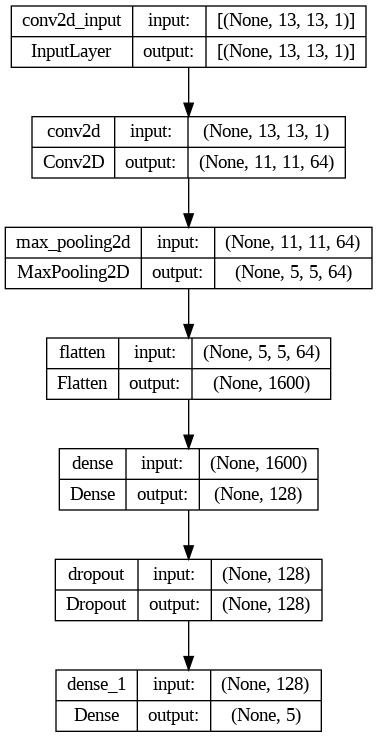

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
from keras.utils import plot_model

# Load the CSV file with features
csv_file = '/content/drive/MyDrive/ Features_Output/Final_1.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Split data into features (X) and labels (y)
X = data.iloc[:, :-1].values  # Exclude the last column ('label')
y = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the features for the 2D CNN input format
num_rows, num_columns = 13, 13  # Adjust as needed based on your feature dimensions
X_train_reshaped = X_train.reshape(X_train.shape[0], num_rows, num_columns, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], num_rows, num_columns, 1)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Build the 2D CNN model
model_cnn2d = Sequential()
model_cnn2d.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(num_rows, num_columns, 1)))
model_cnn2d.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn2d.add(Flatten())
model_cnn2d.add(Dense(128, activation='relu'))
model_cnn2d.add(Dropout(0.5))
model_cnn2d.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with the desired optimizer and loss function
model_cnn2d.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Plot the architecture of the 2D CNN model and save it as a JPG image
plot_model(model_cnn2d, to_file='2d_cnn_model_architecture.jpg', show_shapes=True, show_layer_names=True)

